# 1. Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from collections import defaultdict

RDKit WARNING: [13:32:18] Enabling RDKit 2019.09.3 jupyter extensions


# 2. define functions

In [2]:
def check_for_bad_smiles(df):
    mollist = {}
    counter = 0
    for i in df.index:
        smi = df['NonstereoAromaticSMILES'][i]
        cid = df['CPD_ID'][i]
        #if not mol: print('rdkit error:',smi)
        if smi.count('[C') > 1: 
            counter += 1
            #mol = Chem.MolFromSmiles(smi)
            #print('check smiles:',smi)
            mollist[cid] = smi  
    print('potentially bad smiles:', counter, '\tunique:',len(mollist))

    #write out bad smiles file
    with open('bad_smiles_list.txt', 'w') as f:
        for n,i in mollist.items():
            f.write('{}\t{}\n'.format(n,i))
    print('bad smiles written to file: bad_smiles_list.txt')

In [3]:
def Recanonicalise_smiles(df):
    canSmiles = []
    for i, smi in enumerate(df.NonstereoAromaticSMILES):
        mol = Chem.MolFromSmiles(smi)
        if not mol:
            canSmiles.append(smi)
            print(i,smi)
        else:
            new_smi = Chem.MolToSmiles(mol, isomericSmiles=False)
            canSmiles.append(new_smi)     
    df['NonstereoAromaticSMILES'] = canSmiles
    return df

In [4]:
def Map_cpds2Kinases(kinase_df, df):
    # map a) all compounds for each target
    #     b) all targets for each compound
    knameset = set(kinase_df.Kinase_name)
    kcpdcounts = {kn: set() for kn in knameset}
    cpd2kinase = defaultdict(set)
    for i in df.index:
        kname = df['Kinase_name'][i]
        cid = df['CPD_ID'][i]
        #smiles = df['NonstereoAromaticSMILES'][i]
        kcpdcounts[kname].add(cid)
        cpd2kinase[cid].add(kname)

    # extract all promiscuous compounds
    promlist = set()
    for x in cpd2kinase.keys():
        if len(cpd2kinase[x]) >= PD: # greater or equal to 2 associated kinase targets is classified as promiscuous
            promlist.add(x)

    # make new dict with compound list and cmpd count for each target
    twodict = {}
    promdict = {}
    for x in kcpdcounts.keys():
        cpds = kcpdcounts[x] #all unique cpds
        Pcpds = [z for z in kcpdcounts[x] if z in promlist] #promiscuous cpds only
        twodict[x] = [cpds,len(cpds)]
        promdict[x] = [Pcpds,len(Pcpds)]
    return cpd2kinase, twodict, promdict

In [5]:
def Map_cpds2Kinases(kinase_df, df):
    PD=2
    # map a) all compounds for each target
    #     b) all targets for each compound
    knameset = set(kinase_df.Kinase_name)
    kcpdcounts = {kn: set() for kn in knameset}
    cpd2kinase = defaultdict(set)
    for i in df.index:
        kname = df['Kinase_name'][i]
        cid = df['CPD_ID'][i]
        #smiles = df['NonstereoAromaticSMILES'][i]
        kcpdcounts[kname].add(cid)
        cpd2kinase[cid].add(kname)

    # extract all promiscuous compounds
    promlist = set()
    for x in cpd2kinase.keys():
        if len(cpd2kinase[x]) >= PD: # greater or equal to 2 associated kinase targets is classified as promiscuous
            promlist.add(x)

    # make new dict with compound list and cmpd count for each target
    twodict = {}
    promdict = {}
    for x in kcpdcounts.keys():
        cpds = kcpdcounts[x] #all unique cpds
        Pcpds = set([z for z in kcpdcounts[x] if z in promlist]) #promiscuous cpds only
        twodict[x] = cpds
        promdict[x] = Pcpds
    return cpd2kinase, twodict, promdict

In [6]:
def getscaffoldcounts(cidlist):
    scafset = set()
    for cid in cidlist:
        mol = Chem.MolFromSmiles(cid2smilesdict[cid])
        if not mol: scafset.add(cid2smilesdict[cid]) ; continue
        scaf = Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol))
        scafset.add(scaf)
    return len(scafset)

# steps 3-5 have been commented out as these will only run if private inhouse data is available

## 3. Load dataset

In [7]:
# load data file and filter according to Ppot values
#kinase_data = 'kinase_db_complete/kinase_db_complete.dat'
#kinase_df = pd.read_csv(kinase_data, sep='\t')
#kinase_df['CPD_ID'] = kinase_df['CPD_ID'].astype('int64').astype('object')

## 4. Set variables and filter data

In [8]:
# set variables
#Pval_cutoff = 6  # potency cutoff value, default 5
#PD = 2             # promiscuity degree definition, default 2
#kgroupfilter = ['TK','CMGC']

#df = kinase_df[kinase_df['p_value'] >= Pval_cutoff]
#df = df[df['Kinase_group'].isin(kgroupfilter)]
#print('number of entries in full dataset:\t',len(kinase_df))
#print('number of entries in filtered dataset:\t',len(df))

## 5. Map compounds to kinases and identify promiscuous compounds

In [9]:
#cpd2kinase, Kinase2cpds, Kinase2promCpds = Map_cpds2Kinases(kinase_df, df)

In [10]:
# make df from dicts and combine them showing difference between cpd counts of nonpromiscuous and promiscuous cpds
#dfa = pd.DataFrame.from_dict(Kinase2cpds,orient='index',columns=['smiles','count'])
#dfp = pd.DataFrame.from_dict(Kinase2promCpds,orient='index',columns=['Psmiles','Pcount'])
#dfc = pd.concat([dfa,dfp],axis=1)
#dfc.reset_index(inplace=True)
#dfc.rename(columns={'index':'xName'}, inplace=True)
#print(dfc[['count','Pcount']].sum())

#ml = []
#for x in dfc.Psmiles:
#    ml = ml+x
#print('unique promiscuous cpds:',len(set(ml)))

In [11]:
#df1 = df[df['CPD_ID'].isin(ml)]
#df1.to_csv('Rep_kinases_dataset.csv',sep='\t')

In [25]:
# load data file
kinase_data = 'Rep_kinases_dataset.csv'
kinase_df = pd.read_csv(kinase_data, sep='\t')
df1 = kinase_df.copy()

# 6. Plots - for data in brief

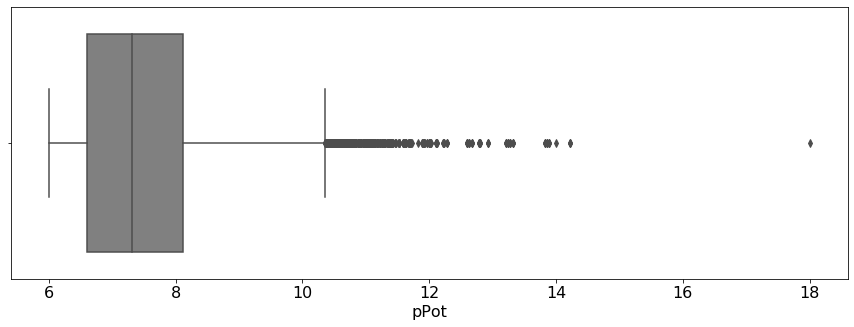

In [14]:
x = plt.figure(figsize=(15,5))
x = sns.boxplot(df1.p_value, color='grey')
x=plt.xticks(size=16)
x=plt.xlabel('pPot',size=16)
plt.savefig('boxplot.png',bbox_inches='tight')

123005


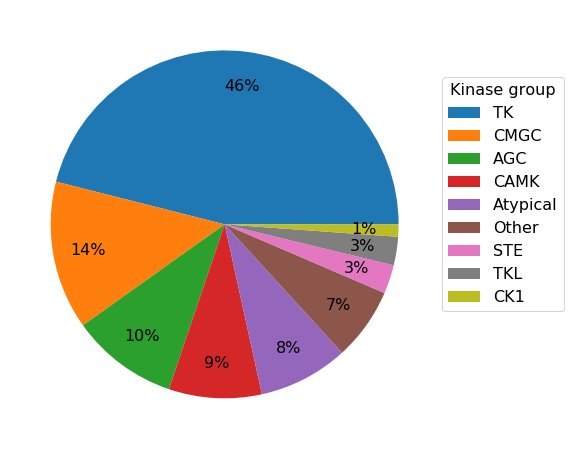

In [15]:
df1['unique_interactions'] = [str(x)+str(y) for x, y in zip(df1['CPD_ID'],df1['Kinase_name'])]
df2 = df1.groupby('unique_interactions').first()
print(len(df2))
kg_counts = df2.Kinase_group.value_counts()
#kg_counts = df.Source.value_counts()
x = plt.figure(figsize=(8,8))
x = plt.pie(kg_counts, labels=kg_counts.index, autopct='%1.0f%%', shadow=False, startangle=0, 
            pctdistance=0.8, textprops={'fontsize': 16}, labeldistance=None)
x = plt.legend(loc=(1,0.3),title='Kinase group', title_fontsize=16, fontsize=16)
plt.savefig('pieplot.png',bbox_inches='tight')

# Make histogram

In [23]:
cid2smilesdict = df1[['CPD_ID','NonstereoAromaticSMILES']].set_index('CPD_ID').to_dict()['NonstereoAromaticSMILES']
cpd2kinase, Kinase2cpds, Kinase2promCpds = Map_cpds2Kinases(kinase_df, df1)

In [18]:
from rdkit.Chem.Scaffolds import MurckoScaffold
K2k = defaultdict(set)
for kinase, cpdlist in Kinase2cpds.items():
    for cpd in cpdlist:
        K2k[kinase].update(cpd2kinase[cpd])
        K2k[kinase].remove(kinase)
K2ku = {k: [kl,len(kl)] for (k, kl) in K2k.items()}   
KinaseLinks = pd.DataFrame.from_dict(K2ku,orient='index')   
KinaseLinks.columns = ['linked_kinases','Degree_EW1']

kn2kg = {k: v for (k,v) in zip(kinase_df.Kinase_name,kinase_df.Kinase_group)} # map each kinase to a kinase group

KinaseLinks['Kgroup'] = [kn2kg[x] for x in KinaseLinks.index]
KinaseLinks['Cpds'] = [Kinase2cpds[x] for x in KinaseLinks.index]
KinaseLinks['CpdCount'] = [len(Kinase2cpds[x]) for x in KinaseLinks.index]
KinaseLinks['PCpds'] = [Kinase2promCpds[x] for x in KinaseLinks.index]
KinaseLinks['BMscaf_count'] = [getscaffoldcounts(cids) for cids in KinaseLinks['Cpds']]
KinaseLinks['Prom_BMscaf_count'] = [getscaffoldcounts(cids) for cids in KinaseLinks['PCpds']]

KinaseLinks.sort_values(['Kgroup','CpdCount'], inplace=True)
KinaseLinks[['Degree_EW1','Kgroup','CpdCount']].to_csv('KinaseLinks.csv', sep='\t')

In [19]:
CPI_dict = {k:len(set(v)) for k,v in cpd2kinase.items()}

In [20]:
EW_value = 5 #1, 5, or 10 
infile = 'Selective_EW{}.csv'.format(EW_value)
EWdf = pd.read_csv(infile, sep='\t', index_col = 0)
EWdf.rename(columns={'size':'PcpdCount', 'Degree': 'Degree_EW{}'.format(EW_value)}, inplace=True)
EWdf['PromScore'] = EWdf['PcpdCount']/EWdf['cpdcount']
EWdf.sort_values(['kgroup','PromScore','Degree_EW{}'.format(EW_value)], inplace=True)
EWdf2 = pd.concat([EWdf,KinaseLinks], axis=1)
EWdf2.drop(['Kgroup','CpdCount'], axis=1, inplace=True)
EWdf2['PromScafScore'] = EWdf2['Prom_BMscaf_count']/EWdf2['BMscaf_count']
EWdf2['TPI_1'] = EWdf2['BMscaf_count']
CPIlist2 = []
for cpdset in EWdf2['Cpds']:
    if type(cpdset) != type(set()): 
        CPIlist2.append(cpdset) 
        #print(cpdset)
    else:
        CPIlist1 = [CPI_dict[c] for c in cpdset]
        CPIlist2.append(sum(CPIlist1)/len(CPIlist1))    
EWdf2['TPI_2'] = CPIlist2

36628


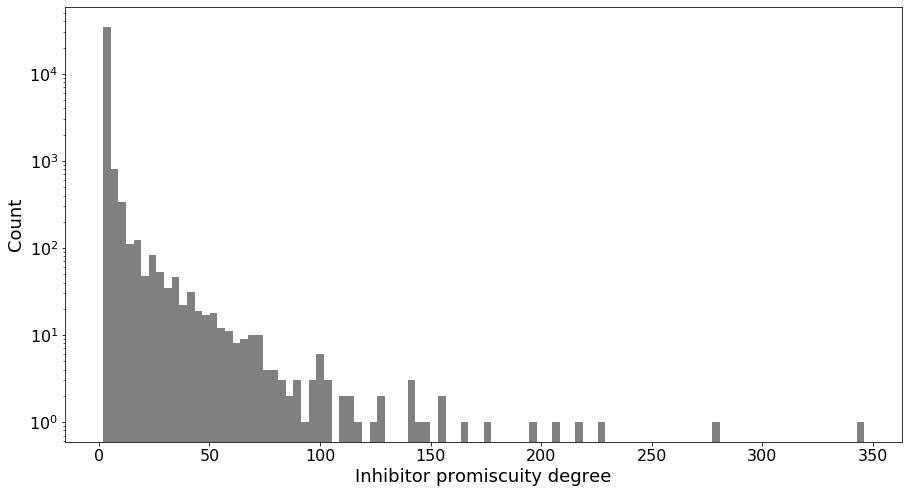

In [21]:
uset = set()
for x in EWdf2.PCpds:
    if type(x) != float:
        uset.update(x)
Pcpdslist = list(uset)
print(len(Pcpdslist))
cpi_pcpds = [CPI_dict[x] for x in Pcpdslist]

plt.figure(figsize=(15,8))
x =plt.hist(cpi_pcpds, bins=100, log=True, color='grey')
plt.xlabel('Inhibitor promiscuity degree', size=18)
plt.ylabel('Count', size=18)
plt.xticks(size=16)
plt.yticks(size=16)
plt.savefig('CpdPromiscuityDegree_histPlot.png', bbox_inches='tight')

In [22]:
from collections import Counter
md = Counter(cpi_pcpds)
#for i in range(max(md.keys())):
#    if i in md: print(i,md[i])
zxc = pd.DataFrame.from_dict(md,orient='index')
zxc.reset_index(inplace=True)
zxc.columns = ['CPI','count']
z = zxc[zxc.CPI >= 100]['count'].sum()
x = zxc[(zxc.CPI < 100) & (zxc.CPI >= 20)]['count'].sum()
c = zxc[(zxc.CPI < 20)]['count'].sum()
print(z,x,c,sum([z,x,c]),round(c/sum([z,x,c])*100, 2),'%')
print(zxc[zxc.CPI == 2])
print(round((21650/36628)*100, 2),'%')

32 453 36143 36628 98.68 %
   CPI  count
0    2  21650
59.11 %
